<a href="https://colab.research.google.com/github/tushar-hub/sentiment-analysis/blob/main/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tusharkasana","key":"35e1ff85bc4c3b14db5c890055748bf2"}'}

In [7]:
!pip install scikit-multilearn
!pip install -q kaggle

In [8]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d prateekkhandelwal18/indian-college-reviews

Dataset URL: https://www.kaggle.com/datasets/prateekkhandelwal18/indian-college-reviews
License(s): CC0-1.0
 66% 5.00M/7.57M [00:00<00:00, 49.0MB/s]
100% 7.57M/7.57M [00:00<00:00, 67.6MB/s]


In [10]:
!unzip  indian-college-reviews.zip

Archive:  indian-college-reviews.zip
  inflating: collegereview2021.csv   
  inflating: collegereview2022.csv   
  inflating: collegereview2023.csv   


In [12]:
CR2021 = pd.read_csv('collegereview2021.csv')

In [13]:
CR2021.sample(20)

,Unnamed: 0,Name,college,review,rating
12553,12553,Manish kumar,Al-Kabir Polytechnic - [AKP],I choose electrical engineering because that t...,10.0
16518,16518,Bhanu,Andhra University - [AU],"In this college, so many fests are happening t...",9.4
9369,9369,varun shukla,Vellore Institute of Technology - [VIT Univers...,The intership offered in VIT are quite good. M...,8.7
13164,13164,shifana,Sathyabama Institute of Science and Technology,The course is extraordinary as it's going to b...,6.9
871,871,Pratham,"Sushant University, School Of Engineering and ...",Because according to the market requirement.\r...,9.0
11531,11531,Student (Anonymous),Government Polytechnic,Yes we have a c-18 curriculum.when we joined i...,8.0
3244,3244,ravi rathore,Dr. Ambedkar Institute of Technology for Handi...,My course is engineering in the computer scien...,7.5
2455,2455,Dikshit,Godavari Institute of Engineering and Technolo...,the course is very difficult but it was an any...,8.0
11640,11640,Ujjwal Yadav,Galgotias University - [GU],The faculty is very good as they ask for doubt...,7.3
14311,14311,Priyanka Hire,Sandip Institute of Technology and Research Ce...,As I come from a defense background and my fat...,6.8


In [14]:
CR2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18298 entries, 0 to 18297
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18298 non-null  int64  
 1   Name        18298 non-null  object 
 2   college     18298 non-null  object 
 3   review      18298 non-null  object 
 4   rating      18298 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 714.9+ KB


In [15]:
CR2021.describe()

,Unnamed: 0,rating
count,18298.000000,18298.000000
mean,9148.500000,7.958591
std,5282.321948,1.323115
min,0.000000,1.000000
25%,4574.250000,7.200000
50%,9148.500000,8.000000
75%,13722.750000,8.875000
max,18297.000000,10.000000


In [16]:
CR2021.shape

(18298, 5)

In [17]:
CR2021.nunique()

Unnamed: 0    18298
Name          11618
college        2269
review        14427
rating           78
dtype: int64

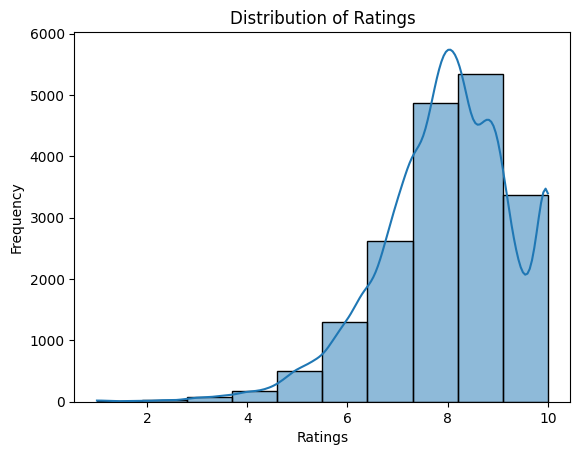

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the reviews and ratings
sns.histplot(CR2021['rating'], bins=10, kde=True)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
#Remove Stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

#Clean Text
def clean_text(text):
    text = text.lower()
    text = re.sub("[^a-zA-Z]"," ",text)
    text = ' '.join(text.split())
    return text

#stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence
CR2021['review'] = CR2021['review'].astype(str)
CR2021['review']= CR2021['review'].apply(lambda x: remove_stopwords(x))
CR2021['review'] = CR2021['review'].apply(lambda x:clean_text(x))
CR2021['review'] = CR2021['review'].apply(stemming)


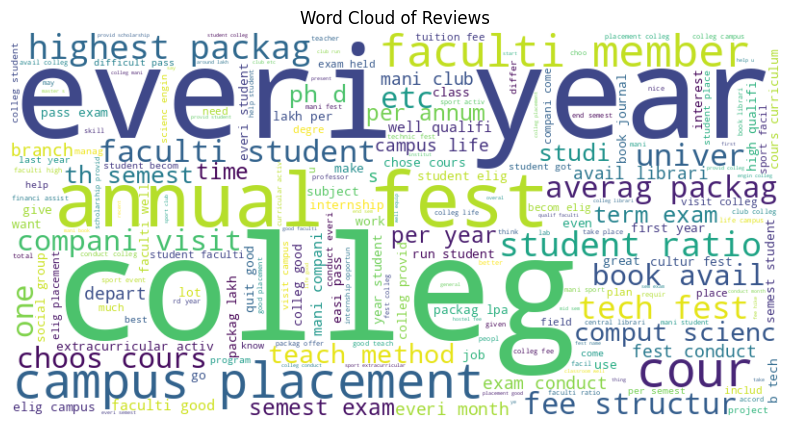

In [23]:
from wordcloud import WordCloud

# Concatenate all reviews into a single string
all_reviews = ' '.join(CR2021['review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

# NLTK Sentiment Analysis:

In [24]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

CR2021['compound_score'] = CR2021['review'].apply(lambda x: sia.polarity_scores(x)['compound'])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [25]:
CR2021['compound_score']

0        0.5719
1        0.9246
2        0.8405
3        0.6705
4        0.9349
          ...  
18293    0.9552
18294    0.9432
18295    0.9860
18296    0.9670
18297    0.5423
Name: compound_score, Length: 18298, dtype: float64

# Model Training for Sentiment Analysis:

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have a DataFrame 'df' with columns 'review_description' and 'rating'
X = CR2021['review']
y = CR2021['rating']

# Convert ratings to binary sentiment labels (1 for positive, 0 for negative)
y = (y > 3).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bag-of-Words representation of the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [27]:
from sklearn.naive_bayes import MultinomialNB

# Create and train the model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [28]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the testing data
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.996448087431694
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       1.00      1.00      1.00      3647

    accuracy                           1.00      3660
   macro avg       0.50      0.50      0.50      3660
weighted avg       0.99      1.00      0.99      3660



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
new_text = ["The college of pretty decent"]
new_text_vectorized = vectorizer.transform(new_text)

In [30]:
predicted_sentiment = model.predict(new_text_vectorized)

if predicted_sentiment[0] == 1:
    sentiment_label = "Positive"
else:
    sentiment_label = "Negative"

print("Predicted Sentiment:", sentiment_label)

Predicted Sentiment: Positive


# EDA using Pandas Profiler:

In [32]:
import ydata_profiling as pp
import seaborn as sns
import warnings
import os

ModuleNotFoundError: No module named 'ydata_profiling'

In [31]:
pp.ProfileReport(CR2021)

NameError: name 'pp' is not defined